In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import normaltest

In [3]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# "Malgun Gothic"
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')

In [108]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

<AxesSubplot: title={'center': '한글폰트'}>

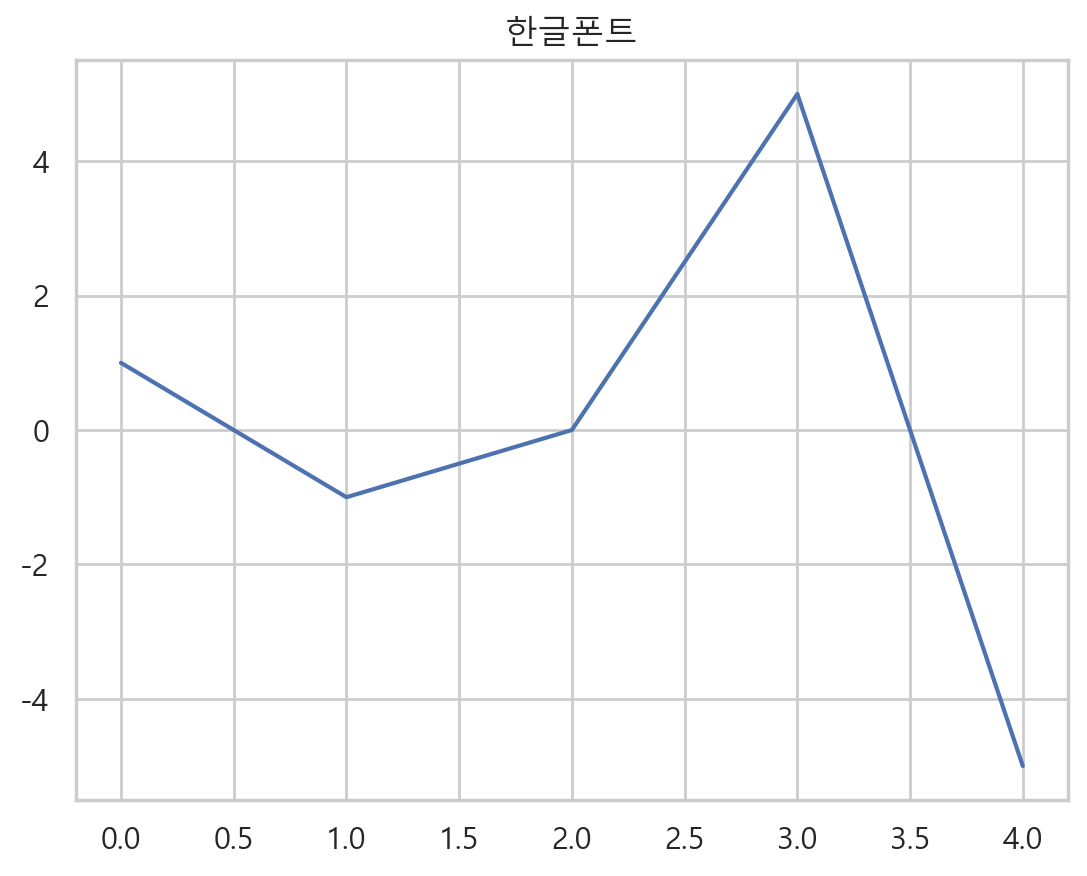

In [109]:
# 한글폰트 설정 확인을 합니다.

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

In [4]:
# 경고 메세지 없애기

import warnings 

warnings.filterwarnings(action='ignore')

데이터 불러오기

In [5]:
df = pd.read_csv("./data/Video_Games.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16717 entries, 0 to 16716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16715 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16715 non-null  object 
 4   Publisher        16663 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Unnamed: 10      0 non-null      float64
 11  Unnamed: 11      0 non-null      float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
dtypes: float64(9), object(5)
memory usage: 1.8+ MB


In [6]:
df['Year_of_Release'] = df['Year_of_Release'].apply(pd.to_numeric)
# df['Year_of_Release'] = df['Year_of_Release'].astype('float64')
# df['Year_of_Release'] = pd.to_numeric(df['Year_of_Release'])
# df['Year_of_Release'].dtypes
# set(df['Year_of_Release'])

In [7]:
df_genre_year = df.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().unstack()
df_genre_year = df_genre_year.fillna(0)
df_genre_year = df_genre_year.reset_index()
#df_genre_year = df_genre_year.stack()
df_genre_year.head()

Genre,Year_of_Release,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,0.34,0.0,0.77,2.71,0.00,0.00,0.00,0.0,7.07,0.00,0.49,0.0
1,1981.0,14.84,0.0,0.00,0.00,6.93,2.24,0.48,0.0,10.04,0.45,0.79,0.0
2,1982.0,6.52,0.0,0.00,0.87,5.03,10.03,1.57,0.0,3.79,0.00,1.05,0.0
3,1983.0,2.86,0.4,0.00,2.14,6.93,0.78,0.00,0.0,0.48,0.00,3.20,0.0
4,1984.0,1.85,0.0,0.00,1.45,0.69,3.14,5.95,0.0,31.10,0.00,6.18,0.0


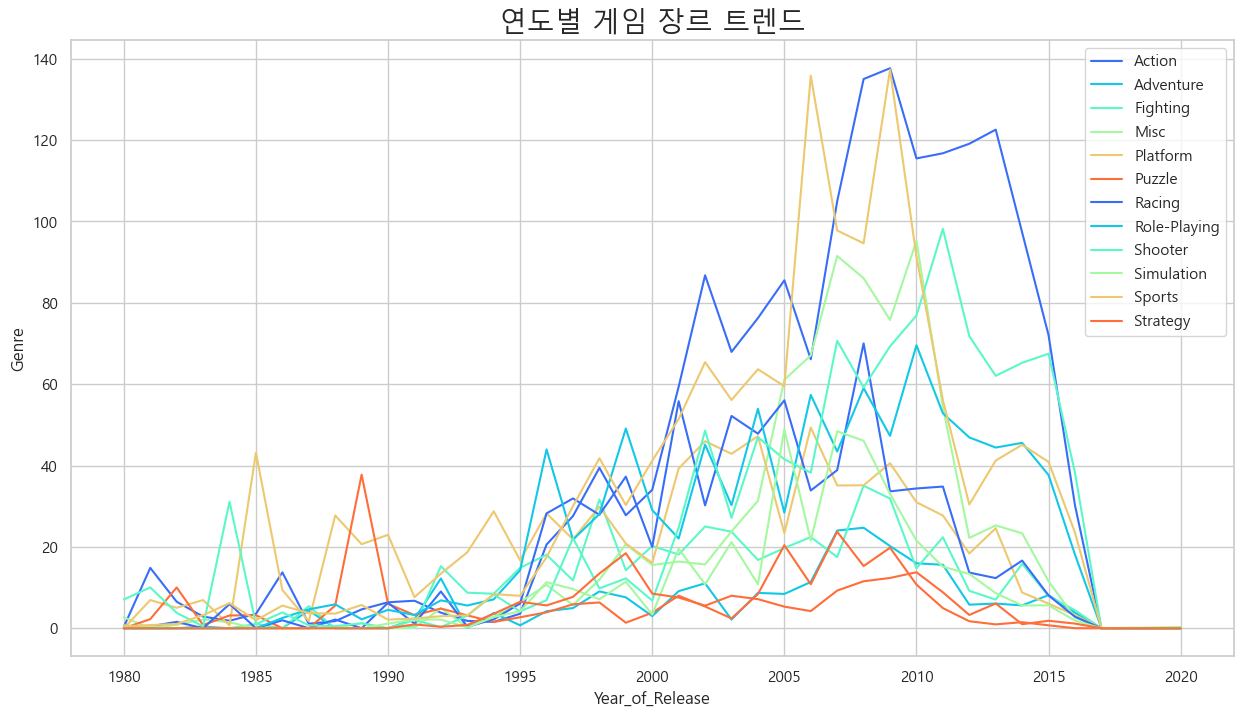

In [53]:
sns.set_palette('rainbow')
color = ['']
plt.figure(figsize=(15, 8))
plt.title('연도별 게임 장르 트렌드', fontsize=20)
plt.ylabel('Genre')

genre = df_genre_year.columns
for i in range(1, len(genre)):
    sns.lineplot(data=df_genre_year, x='Year_of_Release', y=genre[i], label=genre[i])    

연도에 따른 장르별 판매량 (scatterplot)

<AxesSubplot: xlabel='Year_of_Release', ylabel='Global_Sales'>

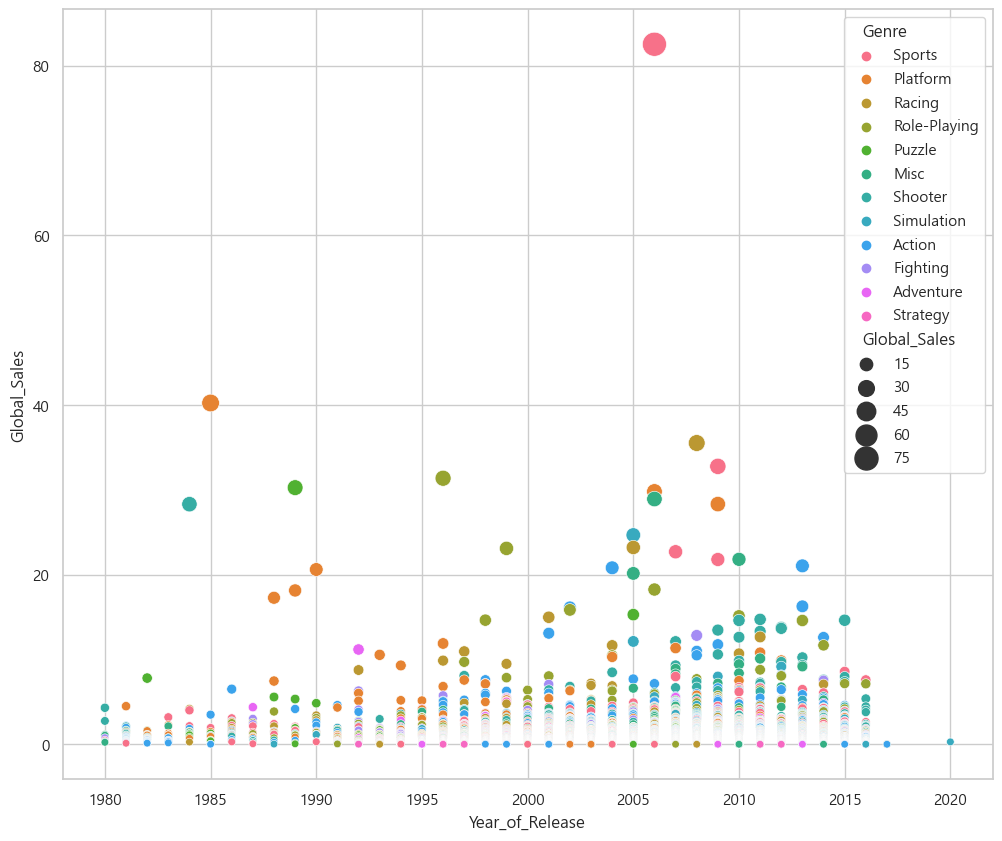

In [57]:
# 연도에 따른 장르 (스캐터)

plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x="Year_of_Release", y="Global_Sales", 
                hue="Genre", size="Global_Sales", sizes=(30, 300))

In [58]:
# 연도에 따른 각 지역별 출고량을 위한 전처리

df_year_region = df.groupby(['Year_of_Release'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum().stack()
df_year_region = df_year_region.reset_index()
df_year_region.rename(columns = {'level_1' : 'Region'}, inplace = True)
df_year_region.rename(columns = {0 : 'Sales'}, inplace = True)
df_year_region.head()

,Year_of_Release,Region,Sales
0,1980.0,NA_Sales,10.59
1,1980.0,EU_Sales,0.67
2,1980.0,JP_Sales,0.00
3,1980.0,Other_Sales,0.12
4,1980.0,Global_Sales,11.38


Text(0.5, 1.0, '연도에 따른 지역별 판매량')

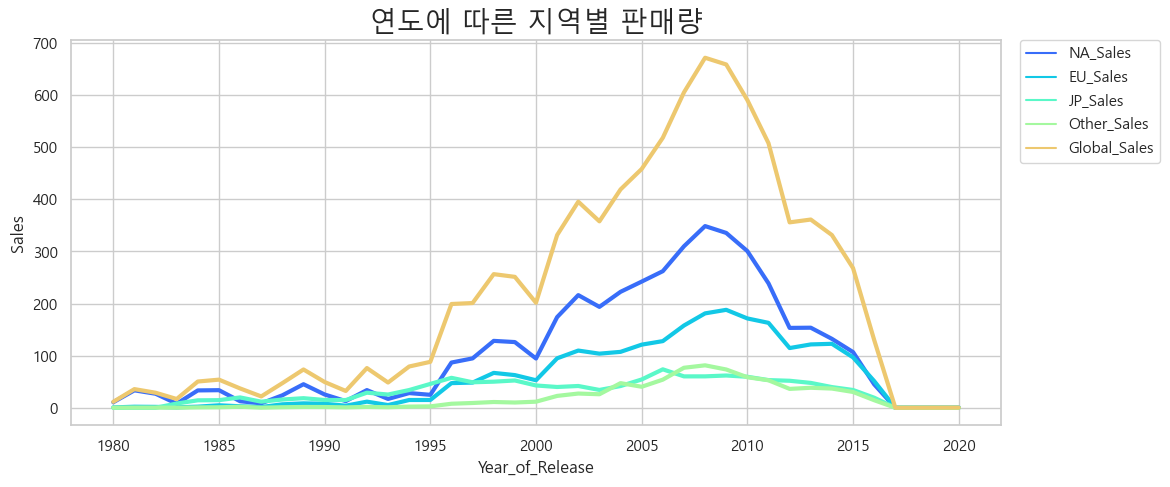

In [59]:
# 연도에 따른 지역별 출고량 그래프 그리기
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_year_region, x="Year_of_Release", y="Sales", hue="Region", linewidth=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('연도에 따른 지역별 판매량', fontsize=20)

In [60]:
# 연도별 top10 플랫폼 트렌드
# 연도에 따른 각 플랫폼별 판매량.

df_year_platform = df.groupby(['Year_of_Release', 'Platform'])['Global_Sales'].sum()
df_year_platform = df_year_platform.reset_index()
df_year_platform.head()

,Year_of_Release,Platform,Global_Sales
0,1980.0,2600,11.38
1,1981.0,2600,35.77
2,1982.0,2600,28.86
3,1983.0,2600,5.83
4,1983.0,NES,10.96


In [61]:
# 판매량이 가장 높은 10개의 플랫폼 리스트 만들기.

df_platform = df_year_platform.groupby('Platform')['Global_Sales'].sum().to_frame()
df_platform = df_platform.sort_values(by='Global_Sales', ascending=False).head(10)
df_platform = df_platform.reset_index()
platform_list = df_platform['Platform'].array

# 판매량이 가장 높은 10개의 플랫폼의 정보를 df_platform_top10에 담기.
df_platform_top10 = pd.DataFrame()

for i in range(len(platform_list)):
    df_p = df_year_platform[df_year_platform['Platform']==platform_list[i]]
    df_platform_top10 = df_platform_top10.append(df_p)
    
df_platform_top10.head(10)

,Year_of_Release,Platform,Global_Sales
94,2000.0,PS2,39.11
104,2001.0,PS2,166.43
113,2002.0,PS2,205.40
119,2003.0,PS2,184.29
125,2004.0,PS2,211.78
132,2005.0,PS2,160.65
140,2006.0,PS2,103.42
151,2007.0,PS2,76.00
160,2008.0,PS2,53.83
168,2009.0,PS2,26.45


Text(0.5, 1.0, '연도에 따른 탑10 플랫폼별 판매량')

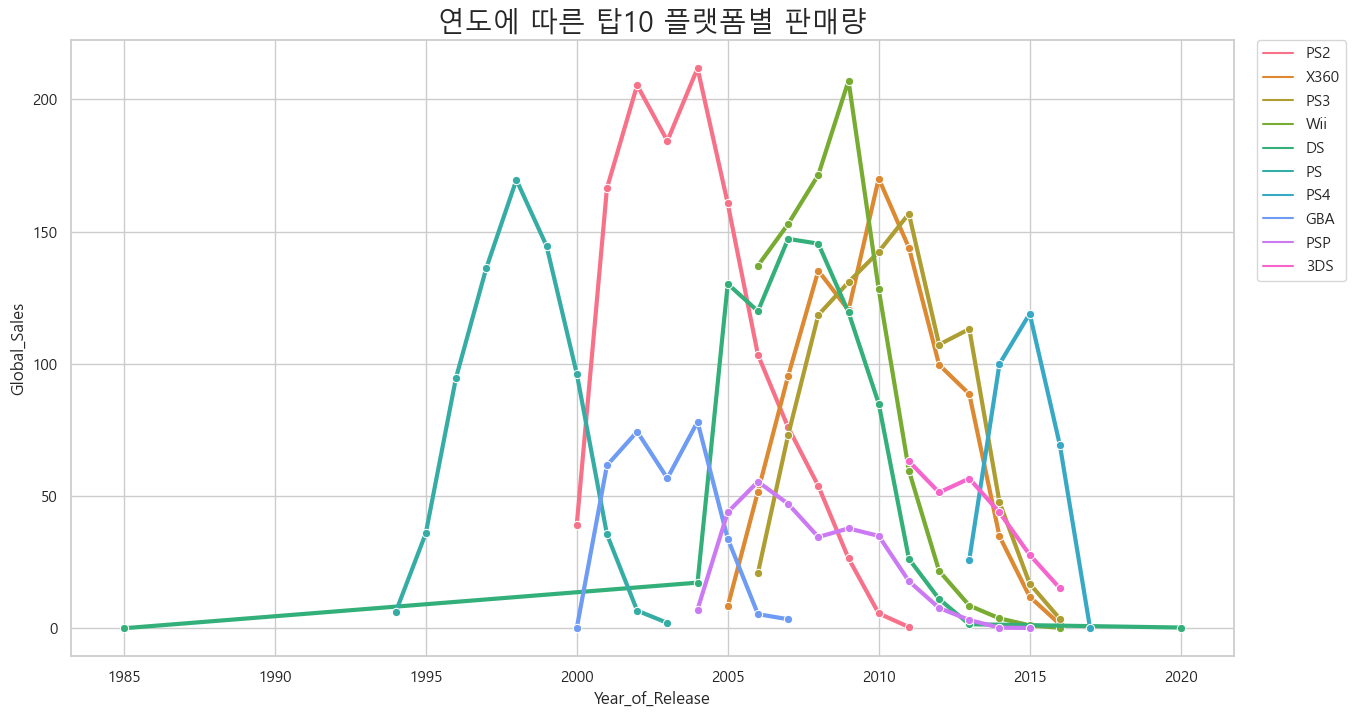

In [62]:
# 연도에 따른 탑10 플랫폼별 판매량 그래프 그리기
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_platform_top10, x="Year_of_Release", y="Global_Sales", hue="Platform", marker='o', linewidth=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('연도에 따른 탑10 플랫폼별 판매량', fontsize=20)


In [63]:
# 판매량이 가장 높은 15개의 플랫폼 리스트 만들기.

df_platform = df_year_platform.groupby('Platform')['Global_Sales'].sum().to_frame()
df_platform = df_platform.sort_values(by='Global_Sales', ascending=False).head(15)
df_platform = df_platform.reset_index()
platform_list = df_platform['Platform'].array

# 판매량이 가장 높은 15개의 플랫폼의 정보를 df_platform_top10에 담기.
df_platform_top15 = pd.DataFrame()

for i in range(len(platform_list)):
    df_p = df_year_platform[df_year_platform['Platform']==platform_list[i]]
    df_platform_top15 = df_platform_top10.append(df_p)
    
df_platform_top15.head()

,Year_of_Release,Platform,Global_Sales
94,2000.0,PS2,39.11
104,2001.0,PS2,166.43
113,2002.0,PS2,205.40
119,2003.0,PS2,184.29
125,2004.0,PS2,211.78


Text(2016, 120, 'PS4')

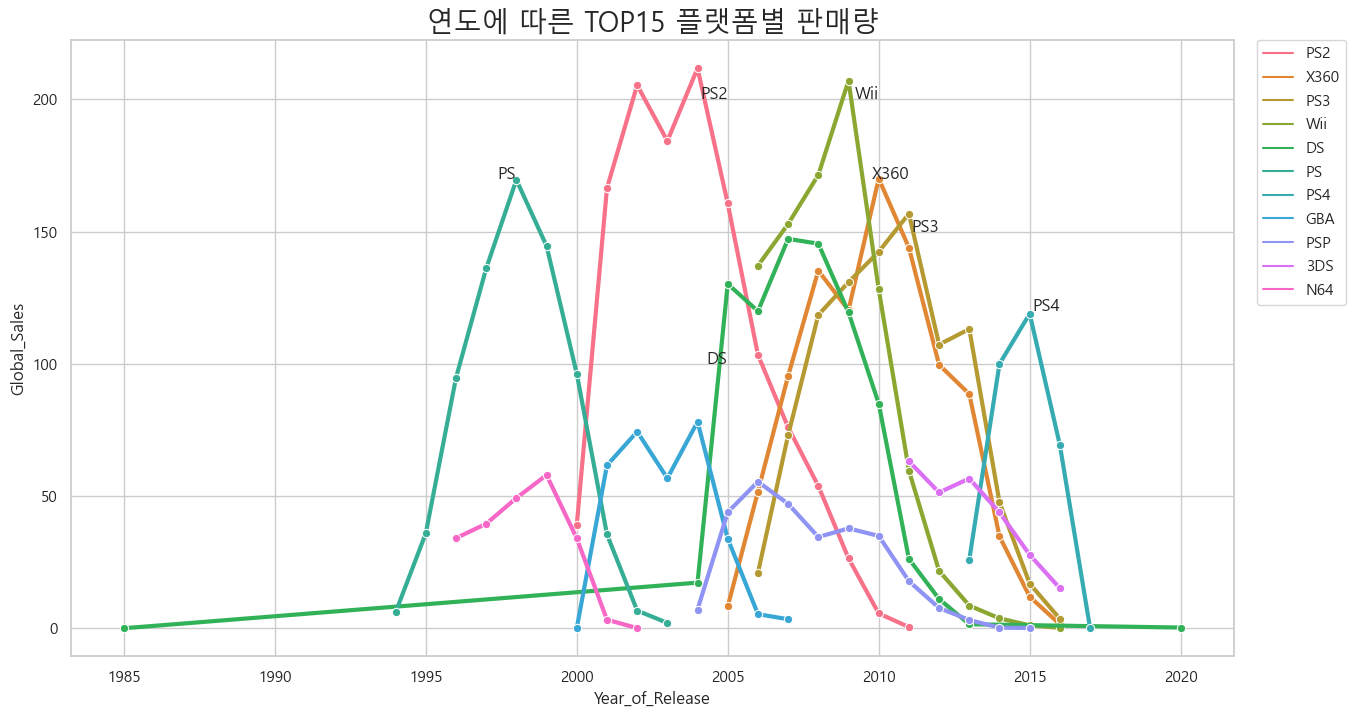

In [132]:
# 연도에 따른 탑15 플랫폼별 판매량 그래프 그리기
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_platform_top15, x="Year_of_Release", y="Global_Sales", hue="Platform", marker='o', linewidth=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('연도에 따른 TOP15 플랫폼별 판매량', fontsize=20)
plt.text(1998,170,'PS',horizontalalignment='right')
plt.text(2005,200,'PS2',horizontalalignment='right')
plt.text(2005,100,'DS',horizontalalignment='right')
plt.text(2010,200,'Wii',horizontalalignment='right')
plt.text(2011,170,'X360',horizontalalignment='right')
plt.text(2012,150,'PS3',horizontalalignment='right')
plt.text(2016,120,'PS4',horizontalalignment='right')

In [134]:
# 시대별 게임장르 트렌드
df_period = df.groupby(['Year_of_Release', 'Genre'])['Genre'].count().unstack()
df_period = df_period.fillna(0)
df_period.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1980.0,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
1981.0,25.0,0.0,0.0,0.0,3.0,2.0,1.0,0.0,10.0,1.0,4.0,0.0
1982.0,18.0,0.0,0.0,1.0,5.0,3.0,2.0,0.0,5.0,0.0,2.0,0.0
1983.0,7.0,1.0,0.0,1.0,5.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1984.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0,0.0


In [135]:
df_period.columns

Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [136]:
df_genre_period = df_period.unstack().reset_index()
df_genre_period.columns = ['Genre', 'Year_of_Release', 'Global_Sales']
df_genre_period.head()

,Genre,Year_of_Release,Global_Sales
0,Action,1980.0,1.0
1,Action,1981.0,25.0
2,Action,1982.0,18.0
3,Action,1983.0,7.0
4,Action,1984.0,1.0


In [137]:
df_period.loc['1980-1989', :] = df_period.loc[[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0]].sum()
df_period.loc['1990-1999', :] = df_period.loc[[1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0]].sum()
df_period.loc['2000-2009', :]= df_period.loc[[2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0]].sum()
df_period.loc['2010-2016', :] = df_period.loc[[2010.0, 2011, 2012, 2013, 2014, 2015, 2016,2017]].sum()

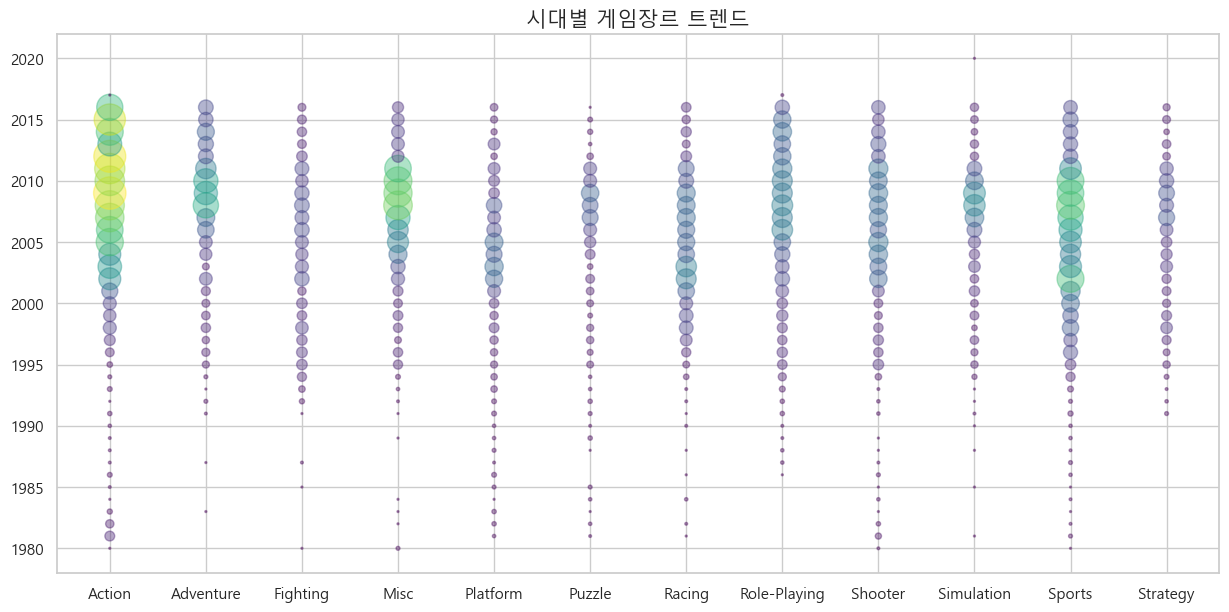

In [138]:
plt.figure(figsize=(15, 7))
plt.title('시대별 게임장르 트렌드', fontsize=15)
plt.scatter(df_genre_period['Genre'], df_genre_period['Year_of_Release'], alpha=0.4, 
            s=df_genre_period['Global_Sales']*2, c=df_genre_period['Global_Sales'], cmap='viridis')
plt.show()

In [139]:
df_period = df_period.loc[['1980-1989', '1990-1999', '2000-2009', '2010-2016']]
df_period.reset_index()
df_period

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_of_Release,,,,,,,,,,,,
1980-1989,66.0,2.0,4.0,8.0,33.0,19.0,8.0,9.0,30.0,3.0,23.0,0.0
1990-1999,162.0,97.0,193.0,116.0,125.0,71.0,183.0,172.0,137.0,86.0,304.0,123.0
2000-2009,1584.0,630.0,441.0,1021.0,567.0,365.0,798.0,732.0,719.0,551.0,1404.0,380.0
2010-2016,1496.0,562.0,199.0,576.0,153.0,114.0,237.0,570.0,410.0,217.0,575.0,170.0


Text(2.2, 900, 'Music')

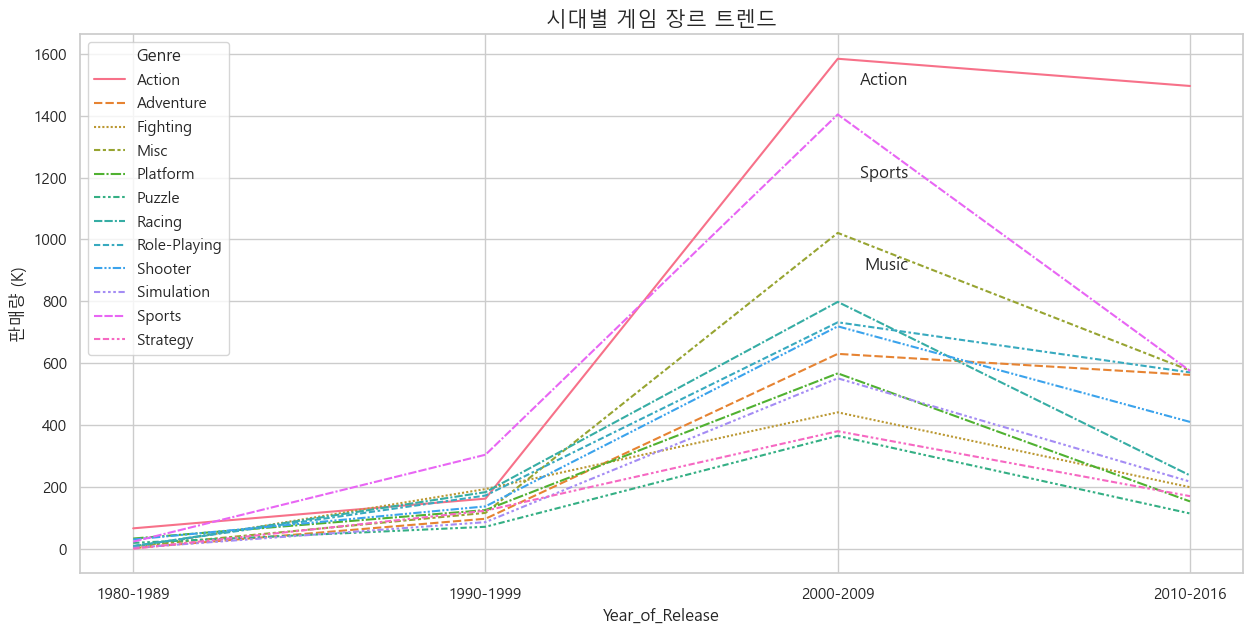

In [140]:
plt.figure(figsize=(15, 7))
plt.title('시대별 게임 장르 트렌드', fontsize=15)
plt.ylabel('판매량 (K)')
sns.lineplot(data=df_period)
plt.text(2.2,1500,'Action',horizontalalignment='right')
plt.text(2.2,1200,'Sports',horizontalalignment='right')
plt.text(2.2,900,'Music',horizontalalignment='right')

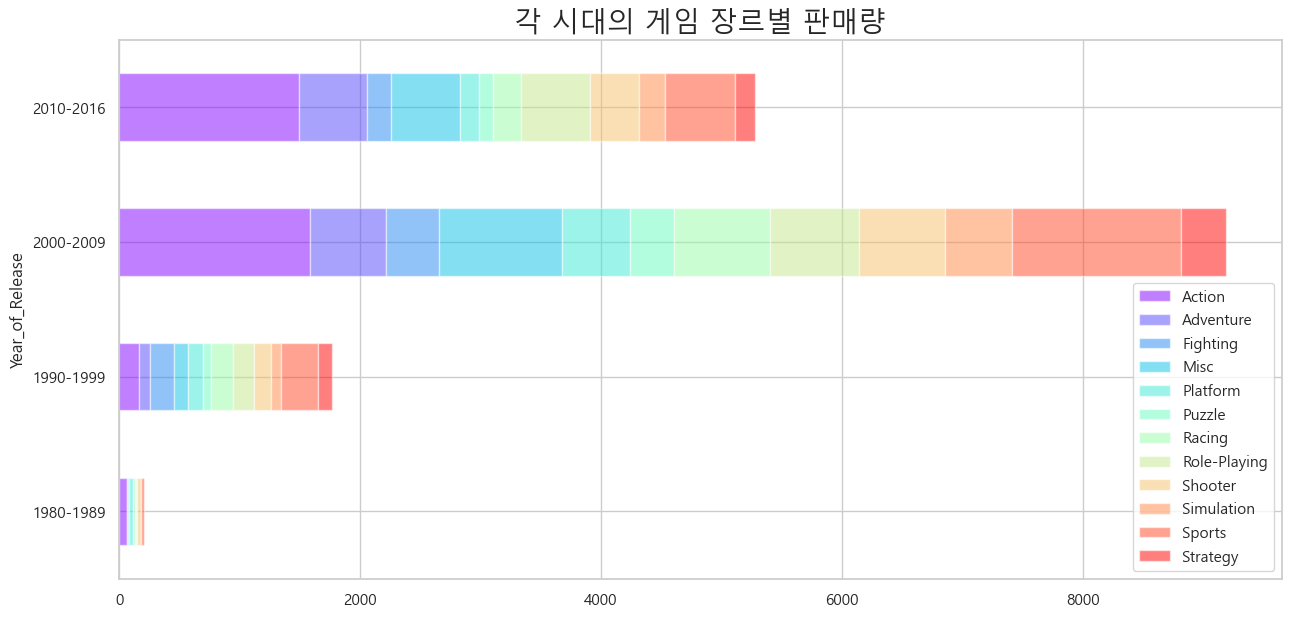

In [141]:
df_period.plot(kind='barh', stacked=True, figsize=(15, 7), cmap='rainbow', alpha=0.5 )
plt.title('각 시대의 게임 장르별 판매량', fontsize=20)
plt.legend(loc='best')

## top30 장르별 판매량

In [142]:
# 판매량이 가장 높은 30개의 데이터를 df_top_sales에 담는다.

df_top30 = df.sort_values(by='Global_Sales', ascending=False).head(30)
df_top30.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN


In [143]:
plt.figure(figsize=(12, 4))
df_top30_genre = df_top30.groupby('Genre')['Global_Sales'].sum().to_frame()

<Figure size 1200x400 with 0 Axes>

In [144]:
df_top30_genre = df_top30_genre.reset_index()
df_top30_genre = df_top30_genre.sort_values(by='Global_Sales', ascending=False)
df_top30_genre.head()

,Genre,Global_Sales
8,Sports,159.79
2,Platform,154.39
5,Role-Playing,103.71
0,Action,74.27
4,Racing,73.71


<AxesSubplot: title={'center': 'TOP 30 게임의 장르별 판매량'}, xlabel='Genre', ylabel='Global_Sales'>

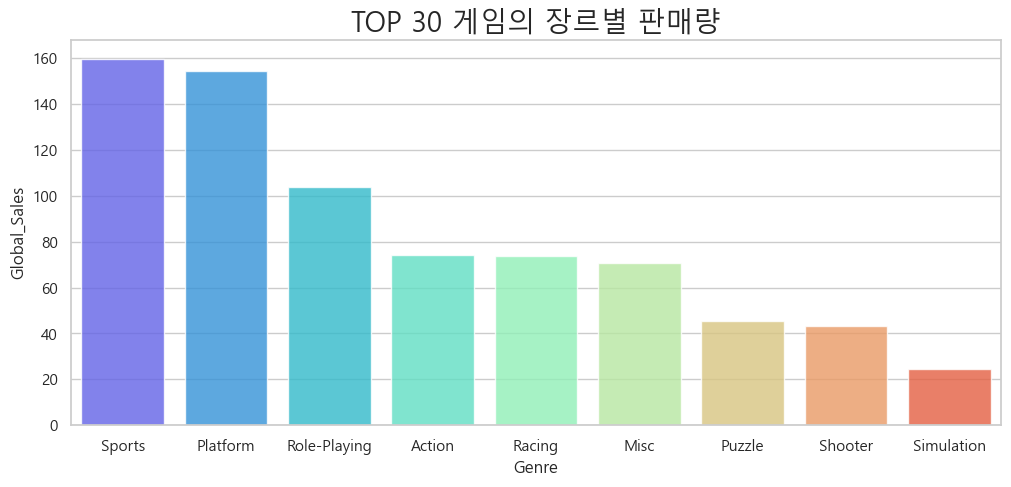

In [145]:
plt.figure(figsize=(12, 5))
plt.title('TOP 30 게임의 장르별 판매량', fontsize=20)
sns.barplot(data=df_top30_genre, x="Genre", y="Global_Sales", palette="rainbow", alpha=0.8)

In [146]:
# 판매량이 가장 높은 100개의 데이터를 df_top_sales에 담는다.

df_top100 = df.sort_values(by='Global_Sales', ascending=False).head(100)
df_top100.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,User_Count
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,8,322.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,8.3,709.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,8,192.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN


In [147]:
plt.figure(figsize=(12, 4))
df_top100_genre = df_top100.groupby('Genre')['Global_Sales'].sum().to_frame()

<Figure size 1200x400 with 0 Axes>

In [148]:
df_top100_genre = df_top100_genre.reset_index()
df_top100_genre = df_top100_genre.sort_values(by='Global_Sales', ascending=False)
df_top100_genre.head()

,Genre,Global_Sales
4,Platform,251.04
8,Shooter,249.98
7,Role-Playing,205.33
10,Sports,183.94
0,Action,156.71


<AxesSubplot: title={'center': 'TOP 100 게임의 장르별 판매량'}, xlabel='Genre', ylabel='Global_Sales'>

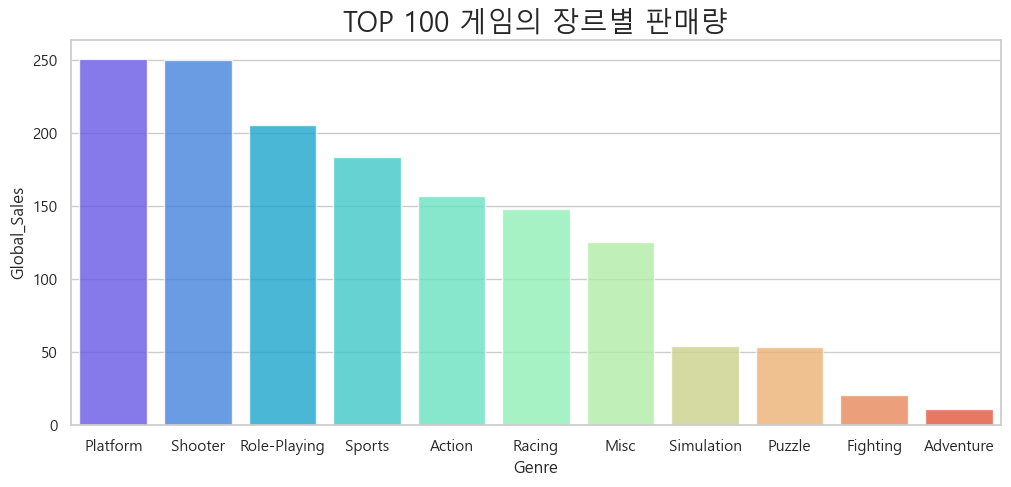

In [149]:
plt.figure(figsize=(12, 5))
plt.title('TOP 100 게임의 장르별 판매량', fontsize=20)
sns.barplot(data=df_top100_genre, x="Genre", y="Global_Sales", palette="rainbow", alpha=0.8)

## TOP100 플랫폼별 판매량

In [166]:
# Platform에 따른 총 판매 (total)을 df_top30_platform에 담습니다.
df_top100_platform = df_top100.groupby(['Platform'])['Global_Sales'].sum()
df_top100_platform = df_top100_platform.to_frame()

# TOP30 게임의 판매율 구합니다.
sum = df_top100_platform['Global_Sales'].sum()

df_top100_platform["판매율 (%)"] = round((df_top100_platform["Global_Sales"] / sum) * 100, 2)
df_top100_platform

,Global_Sales,판매율 (%)
Platform,,
2600,7.81,0.54
3DS,76.36,5.23
DS,205.41,14.08
GB,128.69,8.82
GBA,26.34,1.81
N64,37.45,2.57
NES,93.29,6.39
PC,8.01,0.55
PS,45.60,3.13


In [185]:
PS = df_top100_platform.loc[['PS','PS2','PS3','PS4']]
PS

,Global_Sales,판매율 (%)
Platform,,
PS,45.60,3.13
PS2,84.75,5.81
PS3,110.10,7.55
PS4,59.04,4.05


In [201]:
PS1= PS.transpose()
PS1

Platform,PS,PS2,PS3,PS4
Global_Sales,45.60,84.75,110.10,59.04
판매율 (%),3.13,5.81,7.55,4.05


In [206]:
PS1['PS 판매율 합계'] = PS1['PS'] + PS1['PS2'] + PS1['PS3'] + PS1['PS4']
PS1

Platform,PS,PS2,PS3,PS4,판매율(%) 총합,PS 판매율 합계
Global_Sales,45.60,84.75,110.10,59.04,299.49,299.49
판매율 (%),3.13,5.81,7.55,4.05,20.54,20.54


In [208]:
PS2 = PS1.transpose()

In [210]:
PS_SUM = PS2.loc[['PS 판매율 합계']]
PS_SUM

,Global_Sales,판매율 (%)
Platform,,
PS 판매율 합계,299.49,20.54


In [214]:
df_top100_platform2 = df_top100_platform.drop(['PS','PS2','PS3','PS4'])
df_top100_platform2

,Global_Sales,판매율 (%)
Platform,,
2600,7.81,0.54
3DS,76.36,5.23
DS,205.41,14.08
GB,128.69,8.82
GBA,26.34,1.81
N64,37.45,2.57
NES,93.29,6.39
PC,8.01,0.55
PSP,7.69,0.53


In [216]:
df_top100_platform3 = pd.concat([PS_SUM,df_top100_platform2], axis=0)
df_top100_platform3

,Global_Sales,판매율 (%)
Platform,,
PS 판매율 합계,299.49,20.54
2600,7.81,0.54
3DS,76.36,5.23
DS,205.41,14.08
GB,128.69,8.82
GBA,26.34,1.81
N64,37.45,2.57
NES,93.29,6.39
PC,8.01,0.55


Text(0.5, 1.0, 'TOP 100 플랫폼에 따른 판매율')

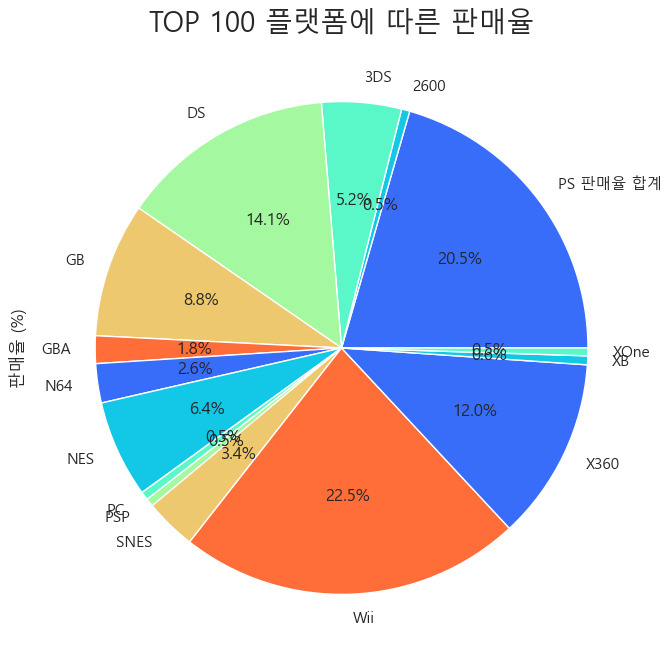

In [217]:
# TOP 100 플랫폼에 따른 판매율

plt.figure(figsize=(8, 8))
df_top100_platform3['판매율 (%)'].plot(kind = "pie", autopct = '%1.1f%%')
plt.title('TOP 100 플랫폼에 따른 판매율', fontsize=20)

## 지역에 따른 게임 출고 분석

In [153]:
df_genre_region = df.groupby(['Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum()
df_genre_region.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,879.01,519.13,161.44,184.60
Adventure,105.26,63.54,52.18,16.49
Fighting,223.36,100.33,87.48,36.36
Misc,407.27,212.74,108.11,74.39
Platform,445.50,200.35,130.83,51.09


<AxesSubplot: >

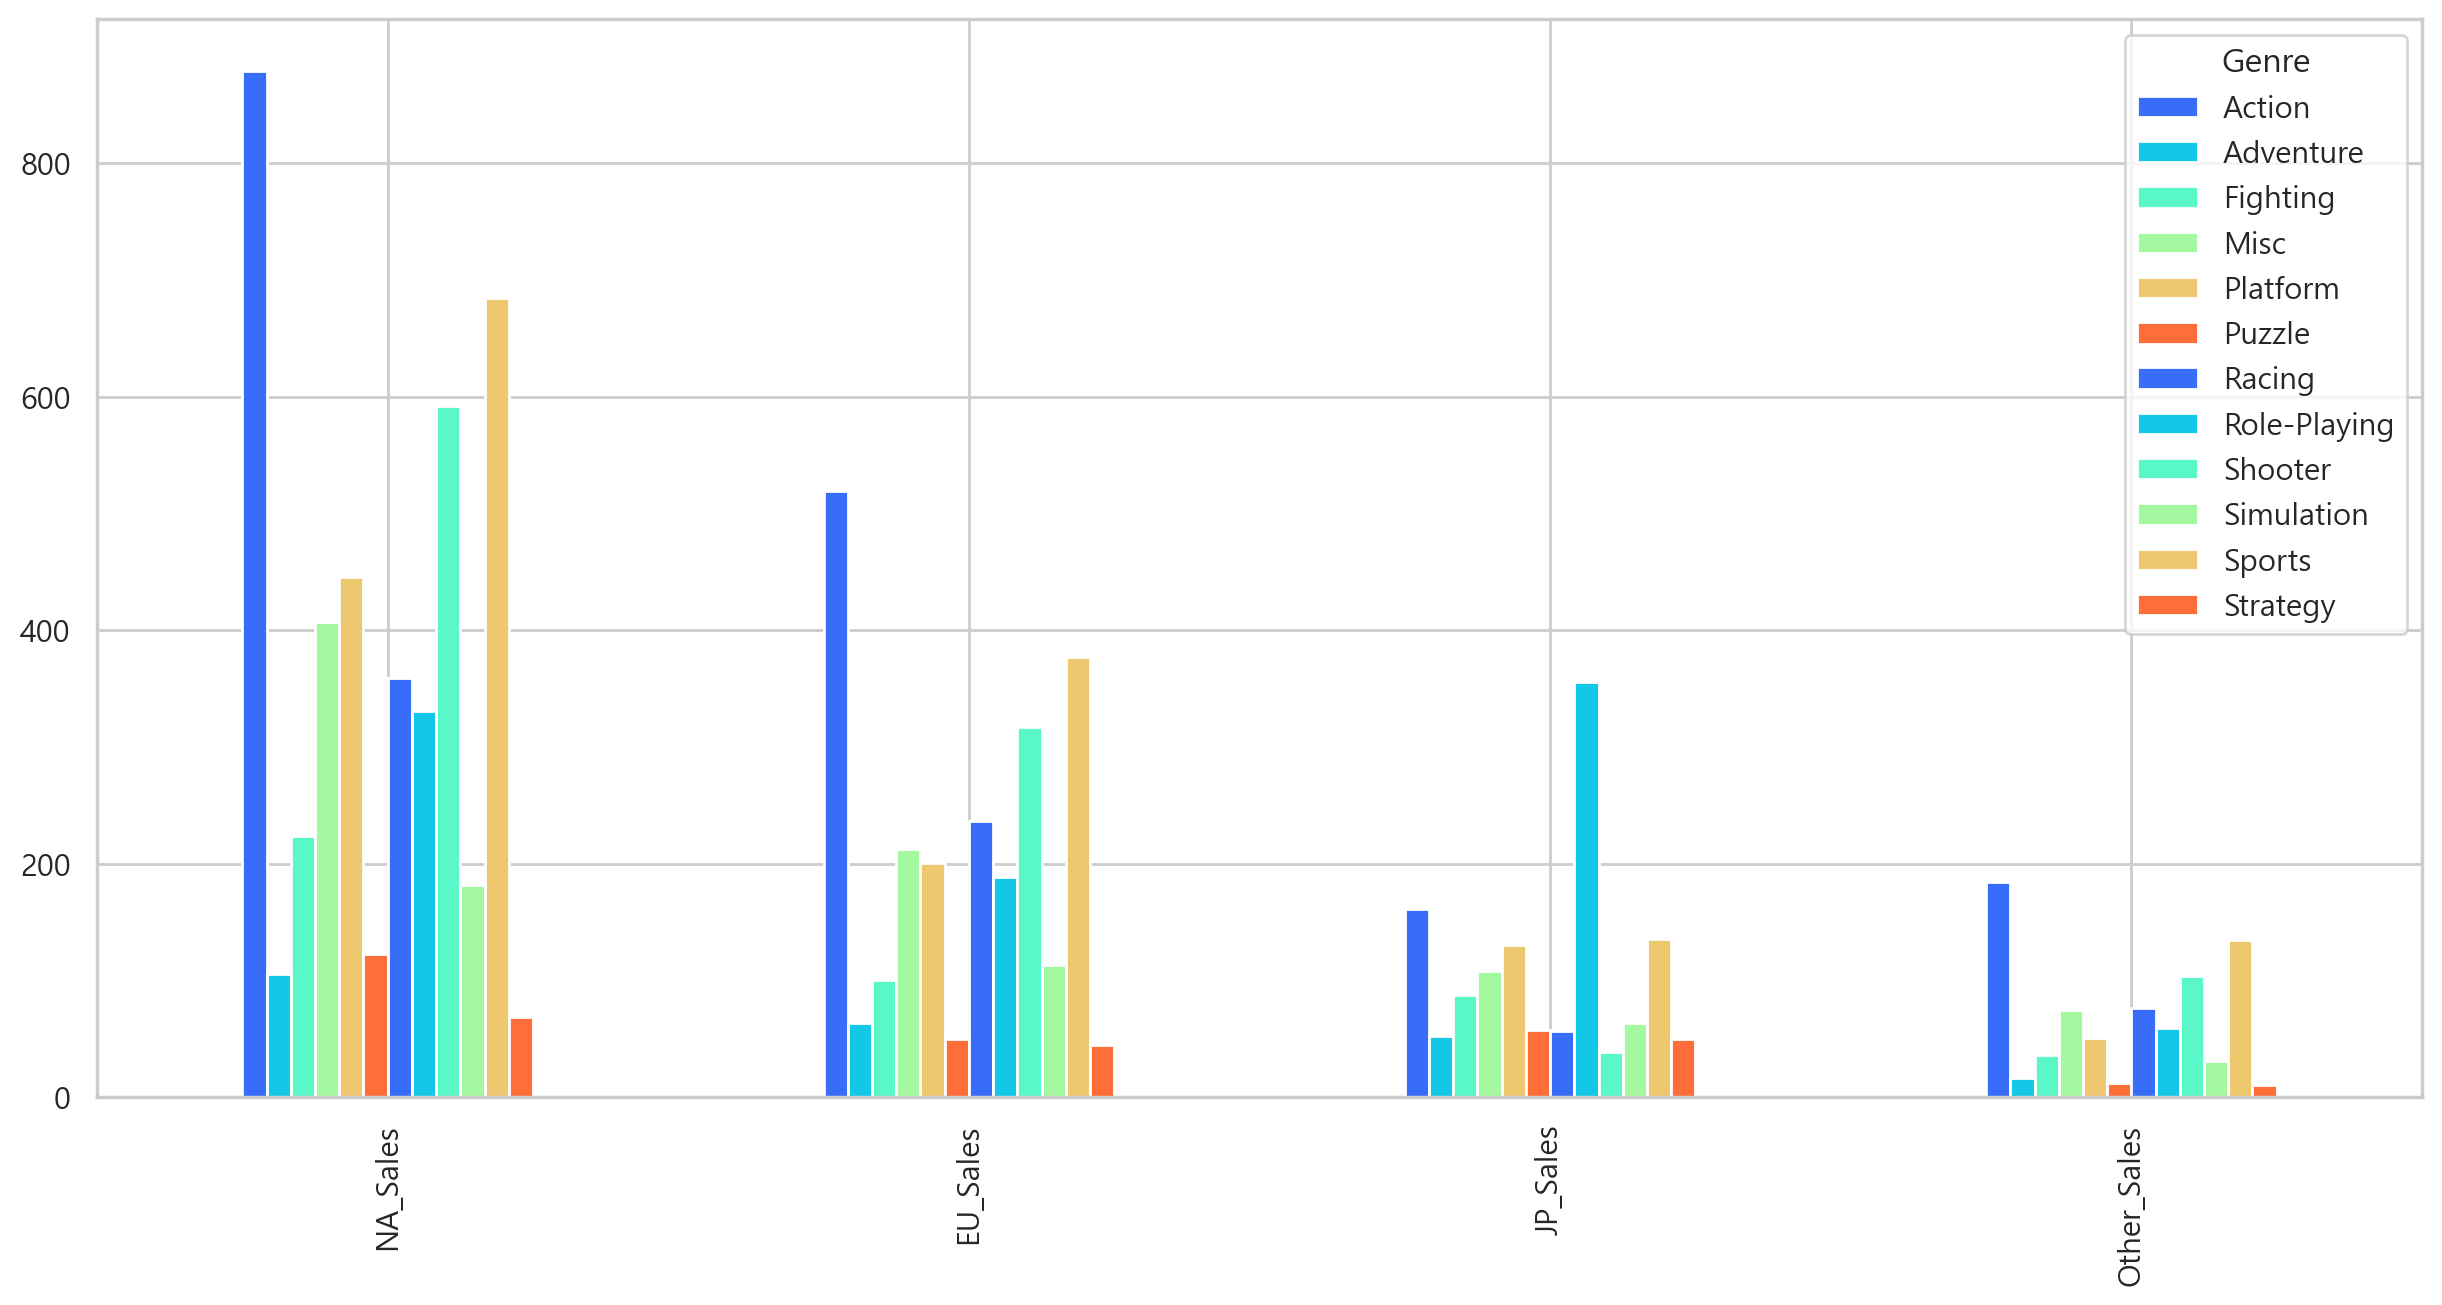

In [154]:
sns.set_palette('rainbow')
df_genre_region.T.plot.bar(figsize=(15,7))

Text(0.5, 1.0, '지역별 게임 장르 판매량')

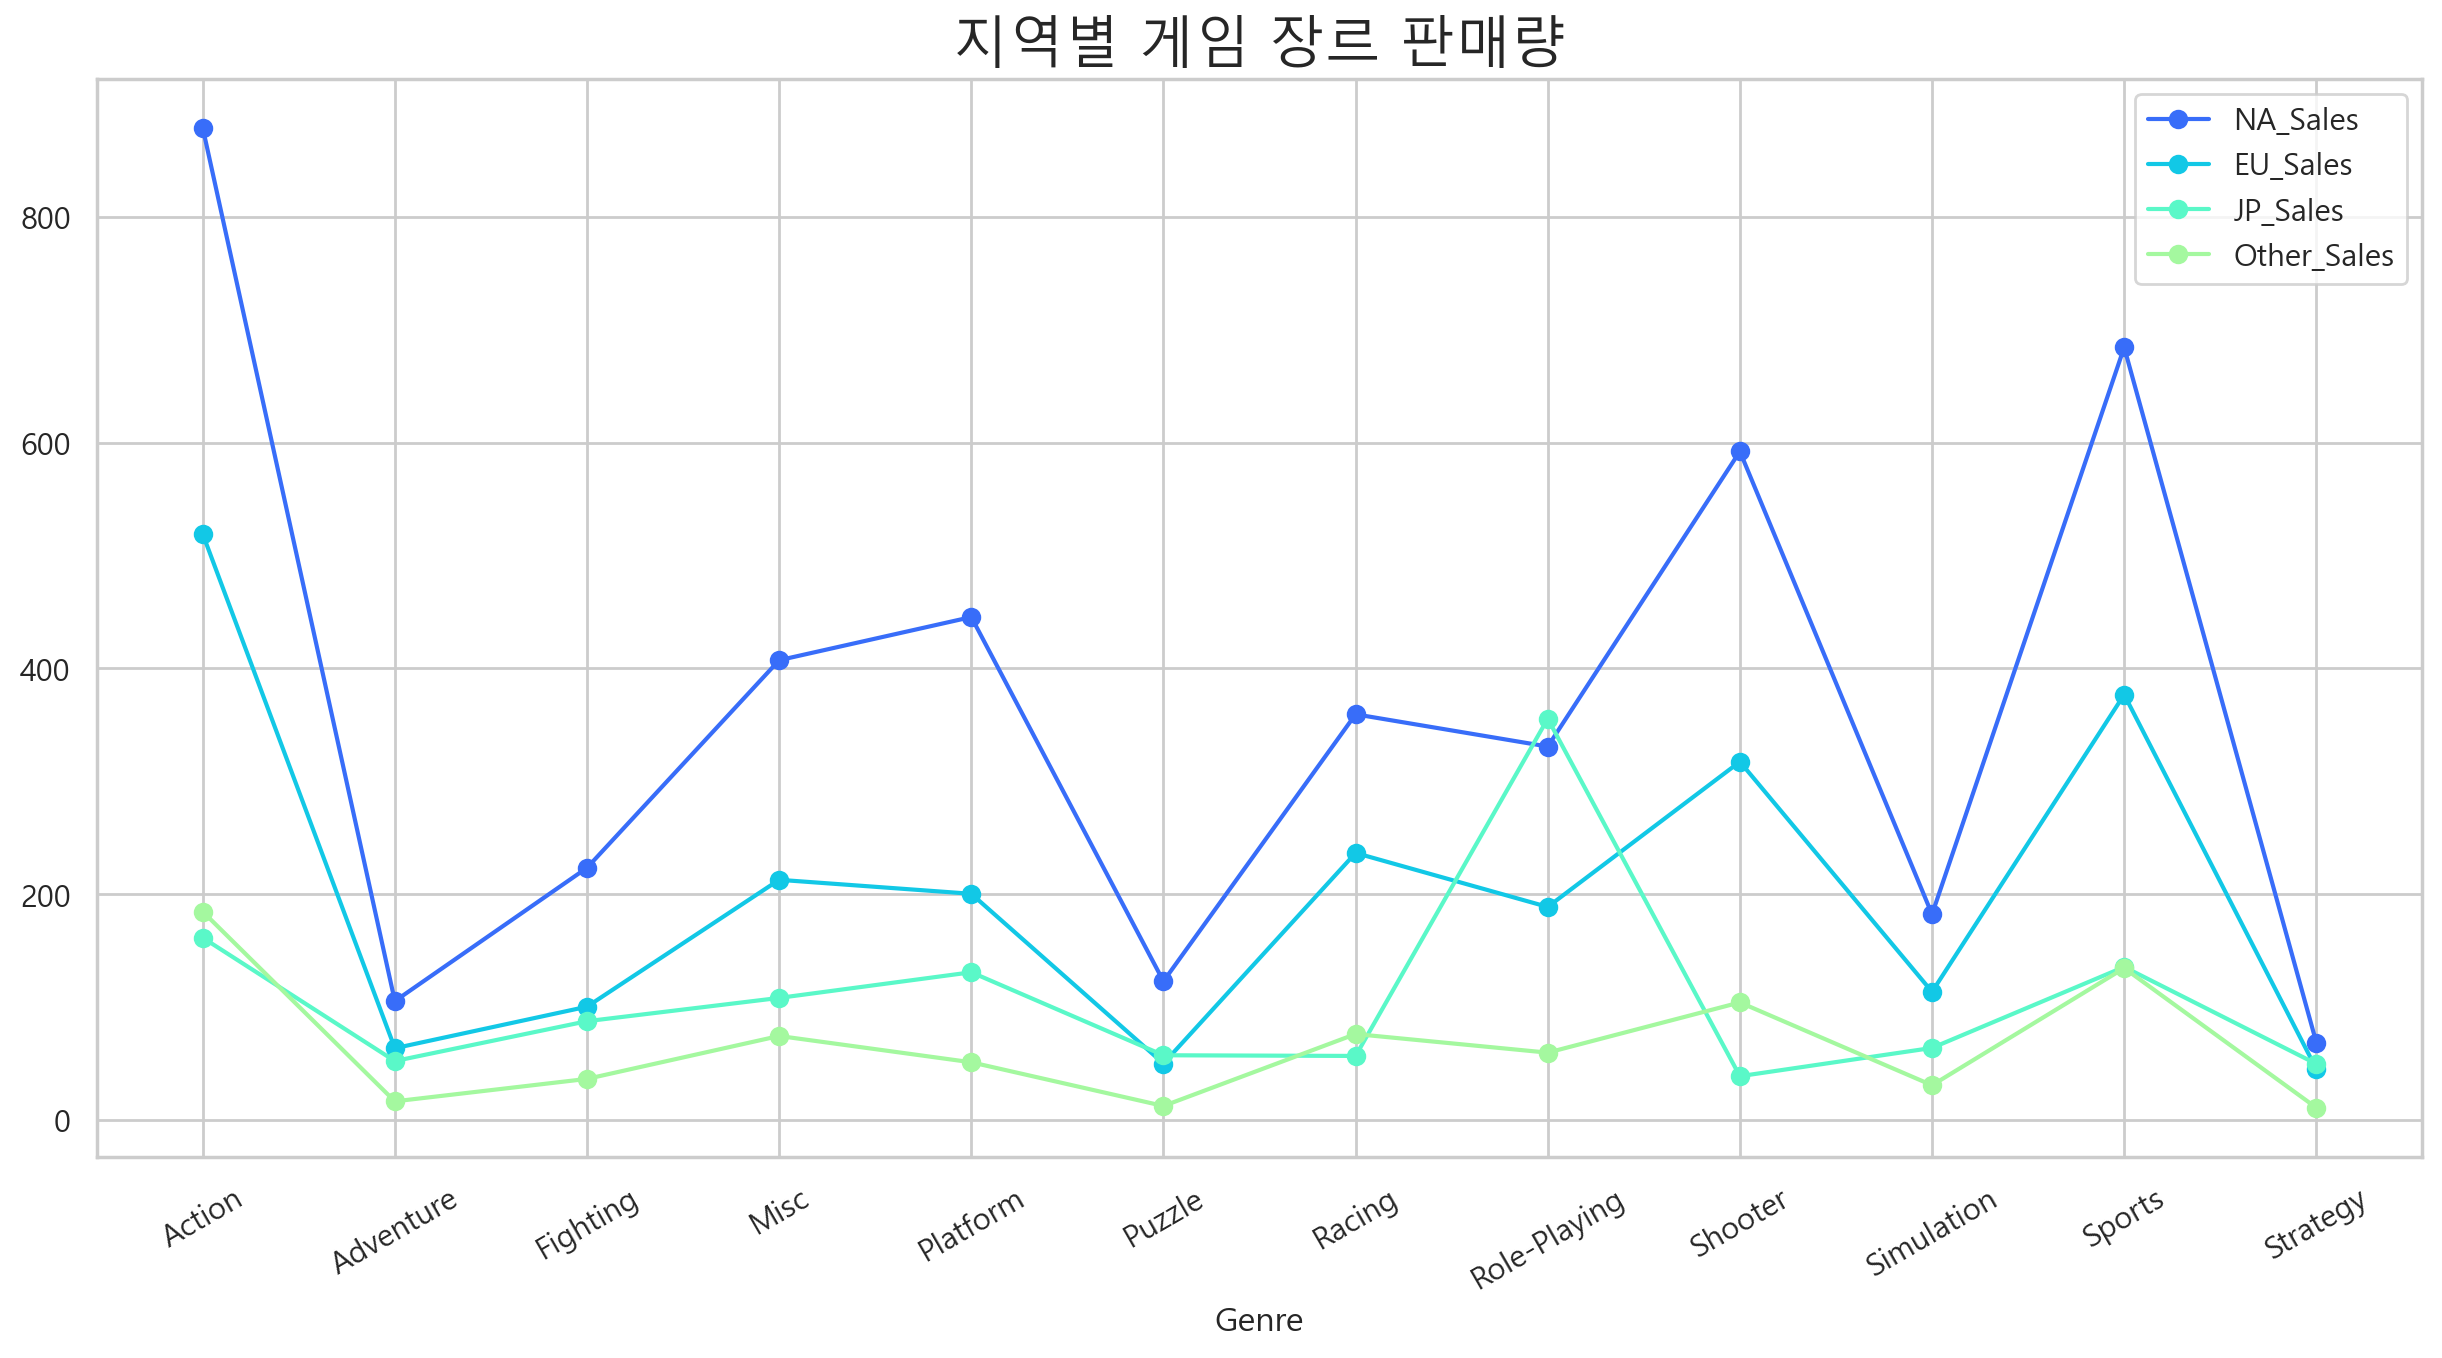

In [155]:
df_genre_region.plot(figsize=(15,7), marker='o')
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing',
                    'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'], rotation=30)

plt.title("지역별 게임 장르 판매량", fontsize=20)

In [161]:
# pip install geopandas

In [179]:
import geopandas as gpd

continent_geo = pd.read_csv("./data/continent_geo.csv")
continent_geo.head()

,continent,geometry
0,Other_Sales,POLYGON ((33.90371119710453 -0.950000000000000...
1,Other_Sales,POLYGON ((-8.665589565454809 27.65642588959236...
2,Other_Sales,POLYGON ((29.33999759290035 -4.499983412294092...
3,Other_Sales,"POLYGON ((41.58513 -1.68325, 40.993 -0.85829, ..."
4,Other_Sales,"POLYGON ((39.20222 -4.67677, 37.7669 -3.67712,..."


In [ ]:
from tqdm import tqdm_notebook
for i in tqdm_notebook(df.index) :
    req

In [180]:
# 각 지역에 따른 장르별 판매량

df_genre = df.groupby(['Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'].sum().unstack().to_frame().reset_index()
df_genre.rename(columns = {'level_0' : 'continent'}, inplace = True)
df_genre.rename(columns = {0 : 'Sales'}, inplace = True)
df_genre.head()

,continent,Genre,Sales
0,NA_Sales,Action,879.01
1,NA_Sales,Adventure,105.26
2,NA_Sales,Fighting,223.36
3,NA_Sales,Misc,407.27
4,NA_Sales,Platform,445.50


In [181]:
# 각 지역별 총 판매량

df_continet = df_genre.drop('Genre', axis=1)
df_continet = df_continet.groupby(['continent'])['Sales'].sum().to_frame()
df_continet

,Sales
continent,
EU_Sales,2424.14
JP_Sales,1297.28
NA_Sales,4400.84
Other_Sales,791.26


In [182]:
# 각 지역의 geometry 정보 병합

df_continet = pd.merge(df_continet, continent_geo, how='inner', on='continent')
df_continet.head()

,continent,Sales,geometry
0,EU_Sales,2424.14,"MULTIPOLYGON (((178.7253 71.0988, 180.00000000..."
1,EU_Sales,2424.14,"MULTIPOLYGON (((15.14282 79.67431000000001, 15..."
2,EU_Sales,2424.14,MULTIPOLYGON (((-51.65779741067889 4.156232408...
3,EU_Sales,2424.14,"POLYGON ((11.02736860519687 58.85614940045936,..."
4,EU_Sales,2424.14,"POLYGON ((28.17670942557794 56.16912995057879,..."


In [183]:
from geopandas import GeoDataFrame
import shapely.wkt

In [184]:
df_continet = GeoDataFrame(df_continet)
df_continet['geometry'] = df_continet['geometry'].apply(shapely.wkt.loads)

In [186]:
# ax = df_continet.plot(column="Sales", legend=True, cmap="Wistia", figsize=(15, 10))
# ax.set_title("각 지역의 게임 판매량", fontsize=20)

# ax.set_axis_off()

## 워드클라우드로 게임 빈도수 표현

In [190]:
# pip install wordcloud

In [200]:
# 워드 클라우드를 시행하기 위한 함수

import re 
from wordcloud import WordCloud

def get_string(text):
    if pd.isna(text):
        return text
    
    text = re.sub("[\d\.'\-(nan)\[\]\/]", "", text)
    text = re.sub(" ", "", text)
    text = re.sub(",{2,}", ",", text)
    return text

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path="./data/HMFMPYUN.ttf",
        width = width, height = height,
        background_color = 'white',
        random_state = 42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 5))
    plt.imshow(word_draw)
    plt.axis('off')
    plt.show()

In [201]:
# 게임 이름을 game_name 에 담습니다.

game_name = str(df["Name"].tolist())
game_name = get_string(game_name)

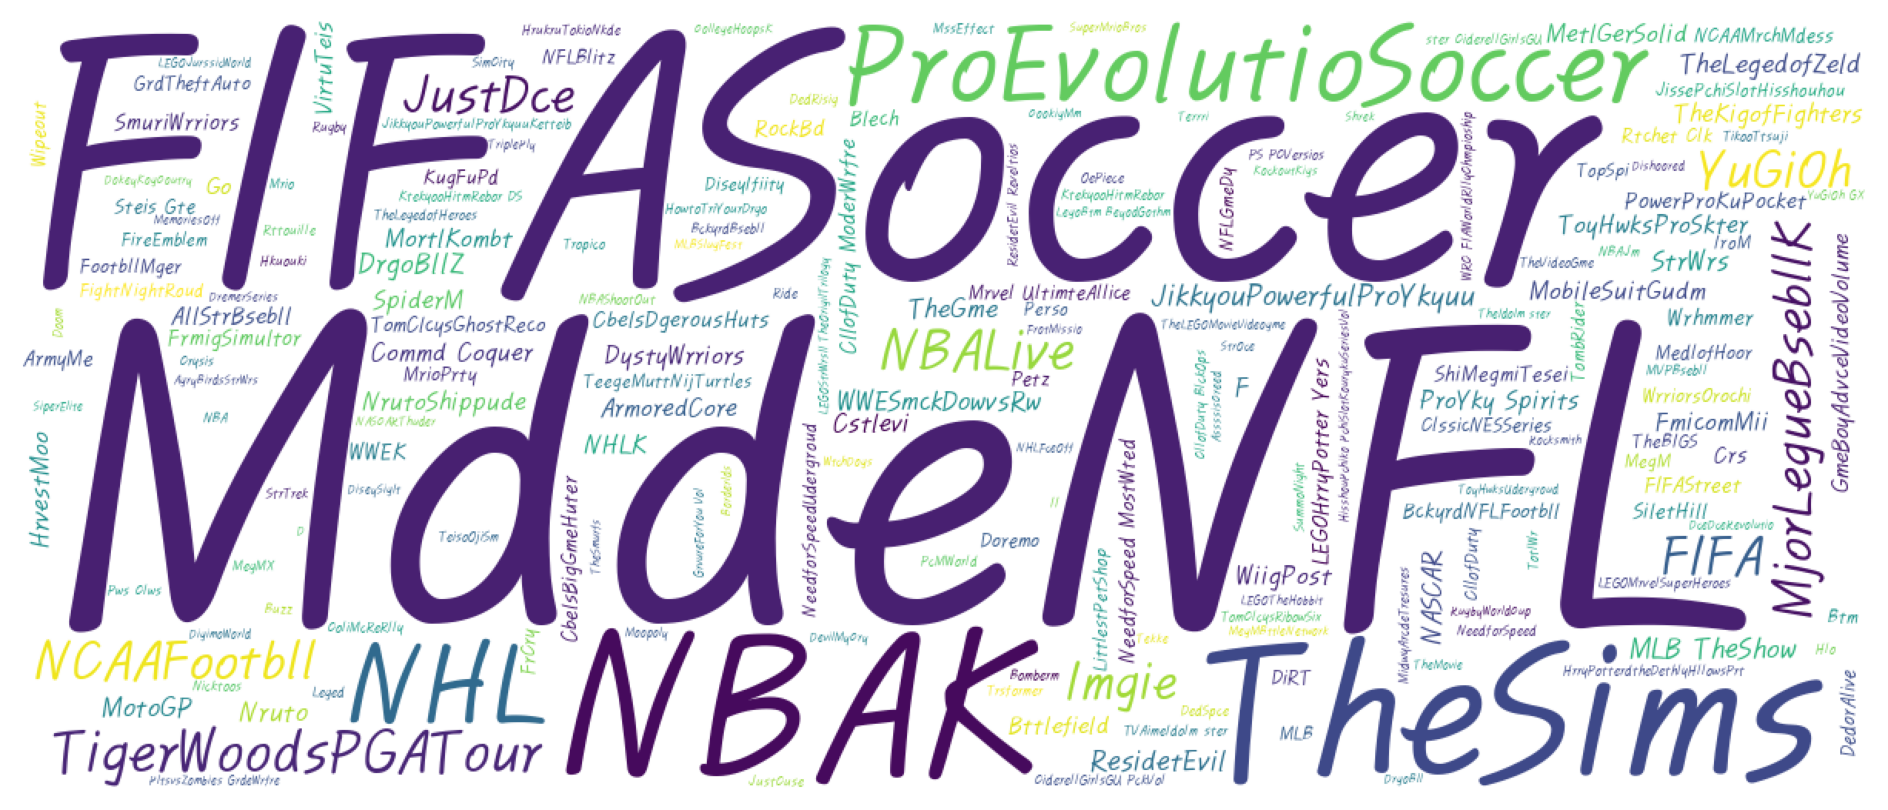

In [202]:
wordcloud(game_name)